<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Prepare-the-data-and-set-basic-information" data-toc-modified-id="Prepare-the-data-and-set-basic-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the data and set basic information</a></span></li><li><span><a href="#Create-a-scStateDynamics-object" data-toc-modified-id="Create-a-scStateDynamics-object-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create a scStateDynamics object</a></span></li><li><span><a href="#Identify-cell-clusters-and-cell-states" data-toc-modified-id="Identify-cell-clusters-and-cell-states-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identify cell clusters and cell states</a></span></li><li><span><a href="#Measure-the-distances-between-cell-states" data-toc-modified-id="Measure-the-distances-between-cell-states-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Measure the distances between cell states</a></span></li><li><span><a href="#Align-the-cell-states-between-two-time-points" data-toc-modified-id="Align-the-cell-states-between-two-time-points-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Align the cell states between two time points</a></span></li><li><span><a href="#Save-the-cell-state-alignment-results" data-toc-modified-id="Save-the-cell-state-alignment-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save the cell state alignment results</a></span></li><li><span><a href="#Perform-factor-analysis-on-the-cell-level-expression-changes" data-toc-modified-id="Perform-factor-analysis-on-the-cell-level-expression-changes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Perform factor analysis on the cell-level expression changes</a></span></li></ul></div>

### Introduction

`scStateDynamics` is method to infer the tumor cell state dynamics under drug treatment and dissect the tumor drug response mechanisms by modeling the expression changes.

In this tutroial, we will show the entire `scStateDynamics` pipeline using the simulation dataset 1.

### Prepare the data and set basic information

Firstly, we set the following basic information:
* `run_label`: The name of dataset.
* `pre_name`: The name of the pre-time point scRNA-seq data.
* `pos_name`: The name of the post-time point scRNA-seq data.
* `savePath`: A path to save the analysis results.

The dataset can be download from ''. 

In [1]:
import os
import scStateDynamics as scd
import scanpy as sc

In [2]:
run_label = "Simulation 1"   # dataset name
pre_name, pos_name = ['Pre', 'Post']   # The name of the pre- and post-timepoint data in the scanpy cell annotation information

dataPath = "../example_data/Simulation_1/"
savePath = '../example_data/Simulation_1-results/'

if not os.path.exists(savePath):
    os.makedirs(savePath)

In [3]:
adata_comb = sc.read(dataPath + 'scobj_comb.h5ad')

### Create a scStateDynamics object

The input data of `scStateDynamics` is a combined [`scanpy`](https://scanpy.readthedocs.io/en/stable/) object (`adata_comb`), containing the scRNA-seq data of both pre- and pos-timepoint. 

**Hint:**
* The steps of preprocess, quality control, normalization, feature selection (highly variable genes identification), and dimensionality reduction (principal component analysis, PCA) should be perfromed in advance. 

* The highly variable genes (HVGs) can be set as the union of the HVGs identified in the data of two time points.

* The cell annotation information `adata_comb.obs` should contain a column (input as parameter `key` in the function `createScStateDynamicsObj`) to indicate the time point or condition information. 

* The PCA results should be stored in `adata_comb.varm` with a key name of `X_pca`.

In [4]:
adata_comb

AnnData object with n_obs × n_vars = 4995 × 1988
    obs: 'Cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'Time'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

This step will create a `scStateDynamics` object `scd_obj`.

In [5]:
scd_obj = scd.createScStateDynamicsObj(
    sc_obj_comb = adata_comb, 
    run_label = run_label, 
    key = 'Time', 
    pre_name = pre_name, pos_name = pos_name, 
    cls_prefixes = ['S', 'T'],   # The prefixes of the cluster labels at pre-timepoint and post-timepoint.
    savePath = savePath
)

### Identify cell clusters and cell states

This step will use the `sc.tl.leiden()` function of `scanpy` to identify cell clusters and cell cliques (also named as meta-cells or cliques) at pre- and post-timepoint. 

Generally, the resolutions for clusters (`cls_resolutions`) can be set as a small value, while the resolutions (`clq_resolutions`) for cell states (meta-cells or cliques) can be set as a large value. 

This function will also save the clustering plots (`Cell-PairUMAP.png`) and the text files (`clique-clsLabel_pre.txt` and `clique-clsLabel_pos.txt`) recording the corresponding relationship between the cell state (meta-cell or clique) identities and cluster identities.


## 1. Identify cell clusters and cell states ---------------------------


/home/glab/wguo/softwares/anaconda3/envs/gwb-r40/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(
/home/glab/wguo/softwares/anaconda3/envs/gwb-r40/lib/python3.9/site-packages/scanpy/tools/_leiden.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


| - N_cells: [1967, 3028]
| - N_clusters: [3 3]
| - N_cliques: [313 359]
| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_Cell-PairUMAP.png


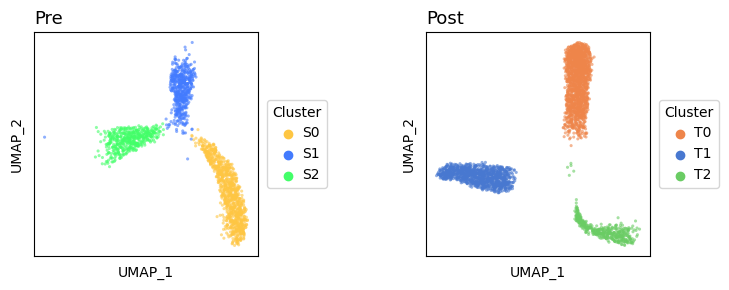

In [6]:
cls_resolutions = [0.2, 0.2]  # Resolutions for identifying cell clusters
clq_resolutions = [30, 30]    # Resolutions for identifying cell states (also named as meta-cells or cliques)
scd_obj.runClustering(cls_resolutions = cls_resolutions, clq_resolutions = clq_resolutions)

### Measure the distances between cell states

The meaning of parameters are:
* `k`: The k-nearest-neighbor distance $ϵ_k(x)$ will be used as an adaptive bandwidth in Gaussian kernel function.
* `alpha`: The exponent $\alpha$ is introduced to mitigate the heavy tail of Gaussian kernel when $ϵ_k (x)$ is large.
* `step`: The number of random-walk steps to obtain the $t$-step diffusion probability.

In [7]:
k, alpha, step = 5, 10, 5
scd_obj.calcGlobalDist(k = k, alpha = alpha, step = step)


## 2. Measure the distances between cell states ---------------------------


### Align the cell states between two time points

This step will align the cell states by minimizing the overall changes in expression and correct the unreasonable flows iteratively.

**1) Align the cell states between two time point, group the cell-level alignments into cell subcluster flows, and quantify the changes in cell states of each subcluster flow.**


## 3. Align the cell states between two time points ---------------------------


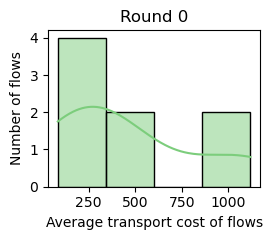

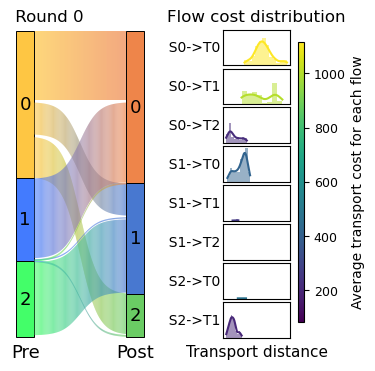

In [8]:
scd_obj.alignCellStates()

**2) Identify the types of cell subcluster flows based on the distribution of the changes in cell states of flows.**

Here, we identified two unreasonable flows by manually setting the threshold.

| - Current error number: 2


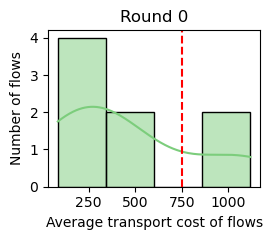

In [9]:
scd_obj.assignFlowType(method = 'Manual', threshold=750)

**3) Correct the unresonable flows and reperform cell state alignments.**


## 4. Correct cluster proliferation or inhibition rates ---------------------------
| Repreforming OT: round  1 ---------


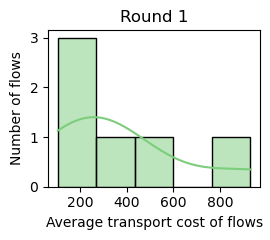

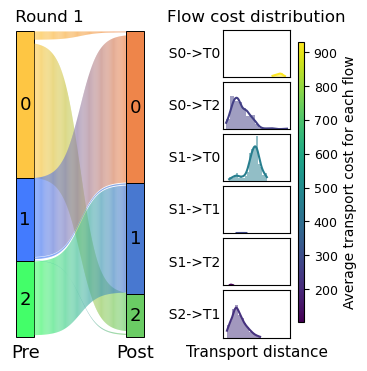

In [10]:
scd_obj.correctGrowthDeath()

**4) Identify the unreasonable flows based on the outlier detection algorithm.**

| - Current error number: 1


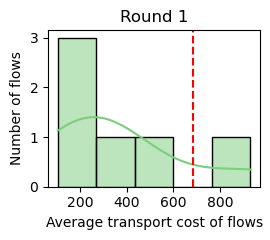

In [11]:
scd_obj.assignFlowType(method = 'Outlier')

**5) Correct the unresonable flows and reperform cell state alignments.**

| Repreforming OT: round  2 ---------


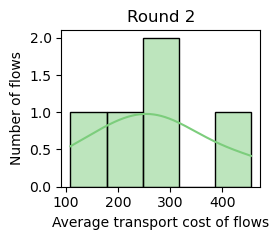

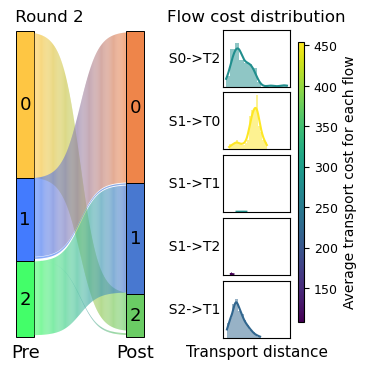

In [12]:
scd_obj.correctGrowthDeath()

Now, the distribution of the changes in cell states of flows is generally unimodal without outliers. Hence, we obtain the final cell alignment relationships and the proliferation or inhibition rates of cell clusters.

The alignment results can be accessed via the function `getAlign_results()`, which can provide the values of `flow_info`, `ot_clq`, `ot_cls`, `grow_rates`, `p_flowCostHist`, and `p_flowSankey` variables at different iteration round (`round_i`). Setting `round_i` as `-1` can obtain the final results (the last iteration round). The meaning the these results can be obtained via `help(scd_obj.getAlign_results)`.

### Save the cell state alignment results

This step will save the cell state alignment results as figure or text files, including
* `Flow-Heatmap.png`: A heatmap showing the cluster alignment matrix.
* `Flow-NormalizedHeatmap.png`: Two heatmaps showing the cluster alignment matrix after row/column normalization.
* `FlowCost-hist.png`: A histogram showing the distribution of cell state changes (flow costs) of cell subcluster flows.
* `GrowthRate-bar.png`: A bar plot showing the estimated proliferation or inhibition rates of clusters.
* `Flow-Sankey.png`: A Sankey plot showing the inferred cell subcluster alignment relationships (subcluster flows), and some histogram plots showing the distribution of the transport distances (costs) in each flow.
* `OT-clq_sparse.txt`: A table recording the alignemnt relationships between cell states (meta-cells or cliques) and the cluster identity of the source and target cell state.
* `FlowInfo.txt`: the basic information of the finally identified cell subcluster flows. Detailed introduction can be found vi `help(scd_obj.getAlign_results)`.
* `FlowInfo-init.txt`: the basic information of the initially identified cell subcluster flows.
* `GrowthRates.txt`: the estimated proliferation or inhibition rates of cell subcluster flows. Positive value indicates proliferation, while negative value indicates inhibition.
* `scd_object.pkl`: the final `scStateDynamics` object.

| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_Flow-heatmap.png
| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_Flow-NormalizedHeatmap.png
| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_FlowCost-hist.png
| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_GrowthRate-bar.png
| - Saving figure: ../example_data/Simulation_1-results/Simulation 1_Flow-Sankey.png


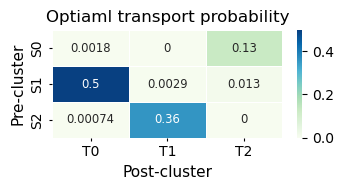

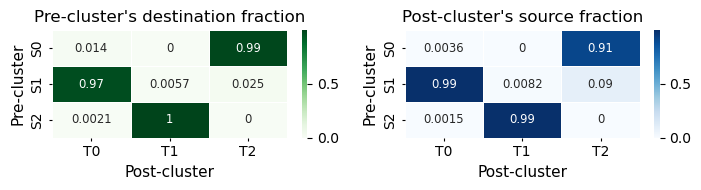

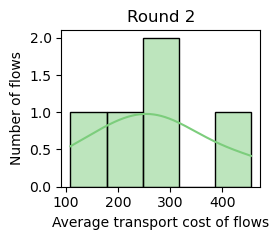

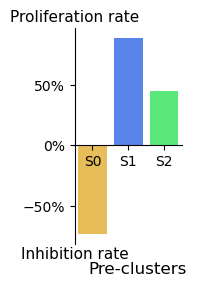

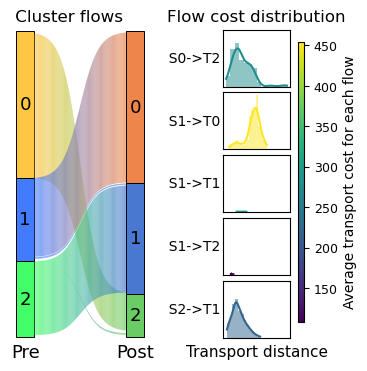

In [13]:
scd_obj.saveResults()

### Perform factor analysis on the cell-level expression changes

This step will use the Bayesian factor analysis model to decompose the cell-level expression into static cluster-specific variations and dyanmic cluster-shared gene factors. This step will update the saved `scStateDynamics` object (`scd_object.pkl`) and save the decomposed results, including `FA-W.txt`, `FA-Z.txt`, `FA-U.txt`, and `FA-V.txt`.


## 5. Perform factor analysis on the cell-level expression changes ---------------------------
Trace Shapes:            
 Param Sites:            
Sample Sites:            
       S dist      |     
        value    3 |     
     log_prob      |     
       u dist    3 | 1988
        value    3 | 1988
     log_prob    3 |     
       T dist      |     
        value    3 |     
     log_prob      |     
       v dist    3 | 1988
        value    3 | 1988
     log_prob    3 |     
       G dist      |     
        value 1988 |     
     log_prob      |     
     tau dist 1988 |     
        value 1988 |     
     log_prob 1988 |     
       K dist      |     
        value    5 |     
     log_prob      |     
       w dist    5 | 1988
        value    5 | 1988
     log_prob    5 |     
       N dist      |     
        value  671 |     
     log_prob      |     
       z dist  671 |    5
        value  671 |    5
     log_prob  671 |     
 delta_x dist  671 | 1988
        value  671 |

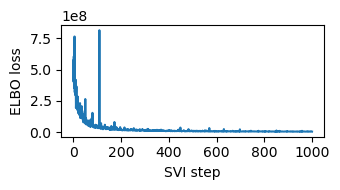

In [14]:
scd_obj.factorAnalysis(5, learningRate = 0.01, steps = 1000)

The decompsed results can also be accessed via the function `getFA_params()`.
* $Z$: Factor activities of cell-pairs.
* $W$: Gene weights of factors.
* $U$: Pre-cluster variation contributed to $\Delta X$.
* $V$: Post-cluster variation contributed to $\Delta X$.

In [15]:
scd_obj.getFA_params('W')    ## W, Z, U, V

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene1991,Gene1992,Gene1993,Gene1994,Gene1995,Gene1996,Gene1997,Gene1998,Gene1999,Gene2000
Factor1,1.295814,0.182038,0.786693,0.488821,0.666218,0.738181,5.636909,0.235296,0.599397,0.460241,...,0.792051,0.471671,2.647417,3.141319,1.356559,0.216186,1.023207,1.002536,0.456922,1.270131
Factor2,0.749301,0.538337,0.717558,0.664158,0.325591,2.452014,1.229641,0.424319,12.488863,0.666104,...,0.446912,1.921309,1.120282,1.259135,0.515841,0.725081,0.540585,0.779742,1.228244,1.965145
Factor3,5.180037,0.316229,2.363076,1.393966,0.273664,0.832455,2.624093,0.923404,1.156550,1.063255,...,0.834219,0.484284,1.523058,0.311273,0.830835,0.205880,2.951278,2.608851,2.658597,0.672893
Factor4,0.762056,1.488069,0.593434,3.432678,0.570529,0.744231,0.819966,0.690893,2.976874,0.202069,...,0.536566,0.203413,1.461718,0.404379,0.125038,0.467231,2.612221,0.343100,0.931320,1.363350
Factor5,2.174031,2.721484,0.954951,1.182088,2.450727,0.518807,0.488238,0.210788,0.734551,0.695106,...,0.490620,0.609664,0.293697,0.833509,0.233030,3.446530,0.710014,0.503817,2.589986,2.497675
